In [157]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import os.path

In [159]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

In [2]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

In [3]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

# Selección del dataset

In [52]:
X, y = generate_gaussians_distributions()
# X, y = generate_elipse_data()

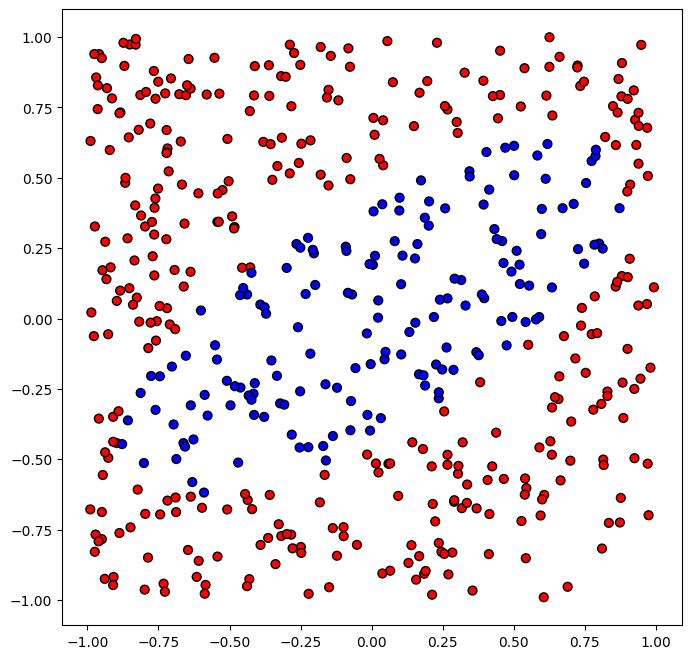

In [18]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

In [19]:
model = LogisticRegression(solver='lbfgs')

In [20]:
model.fit(X, y)

LogisticRegression()

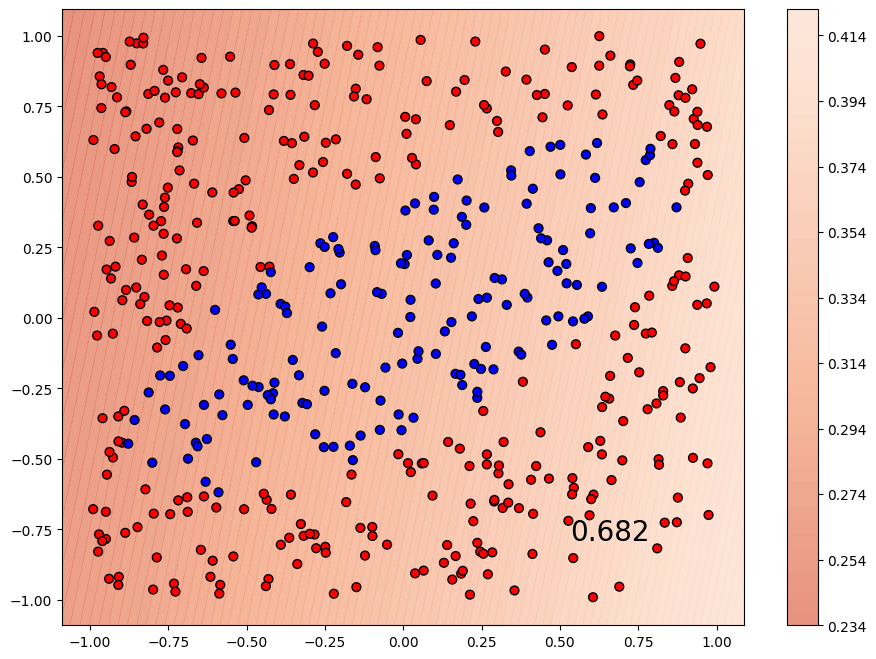

In [21]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [23]:
np.array([0.5, -0.75]).reshape(1, 2)

array([[ 0.5 , -0.75]])

In [26]:
model.predict_proba([[0.5, -0.75]])

array([[0.63053289, 0.36946711]])

# Regresión polinomial

In [16]:
print('La dimensión de las observaciones',X.shape, 'Tiene que quedar en (500, 6)')

La dimensión de las observaciones (500, 2) Tiene que quedar en (500, 6)


In [27]:
# Completar la función 
def add_columns(X):
    # Se agrega primer columna elevada al cuadrada como 3er columna
    X = np.append(X, (X[:,0]**2).reshape(-1,1), axis=1)
    # TODO: Agregar producto de primer columna por segunda columna en la cuarta columna
    X = np.append(X, (X[:,0]*X[:,1]).reshape(-1,1), axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # TODO: Agregar segunda columna elevada al cuadrada como 5er columna
    X = np.append(X, (X[:,1]**2).reshape(-1,1), axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # Se agrega la columna de 1s como 6ta columna para despues usar fit_intercept=False. Es necesario para la librería de graficación
    X = np.append(np.ones((len(X), 1)), X, axis=1)
    return X

In [53]:
add_columns(X).shape

(500, 6)

In [67]:
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False)

In [68]:
model_poly.fit(add_columns(X), y)

LogisticRegression()

In [62]:
add_columns(X)

array([[ 1.        ,  0.33695625,  0.63909567,  0.11353951,  0.21534728,
         0.40844328],
       [ 1.        ,  0.43491148,  0.82888503,  0.18914799,  0.36049161,
         0.6870504 ],
       [ 1.        ,  0.55093811,  0.40850818,  0.3035328 ,  0.22506272,
         0.16687893],
       ...,
       [ 1.        , -0.56674006, -0.33889172,  0.32119429,  0.19206351,
         0.1148476 ],
       [ 1.        ,  0.31847839, -0.04734769,  0.10142849, -0.01507922,
         0.0022418 ],
       [ 1.        , -0.43062266, -0.06893343,  0.18543587,  0.0296843 ,
         0.00475182]])

ValueError: X has 6 features, but LogisticRegression is expecting 2 features as input.

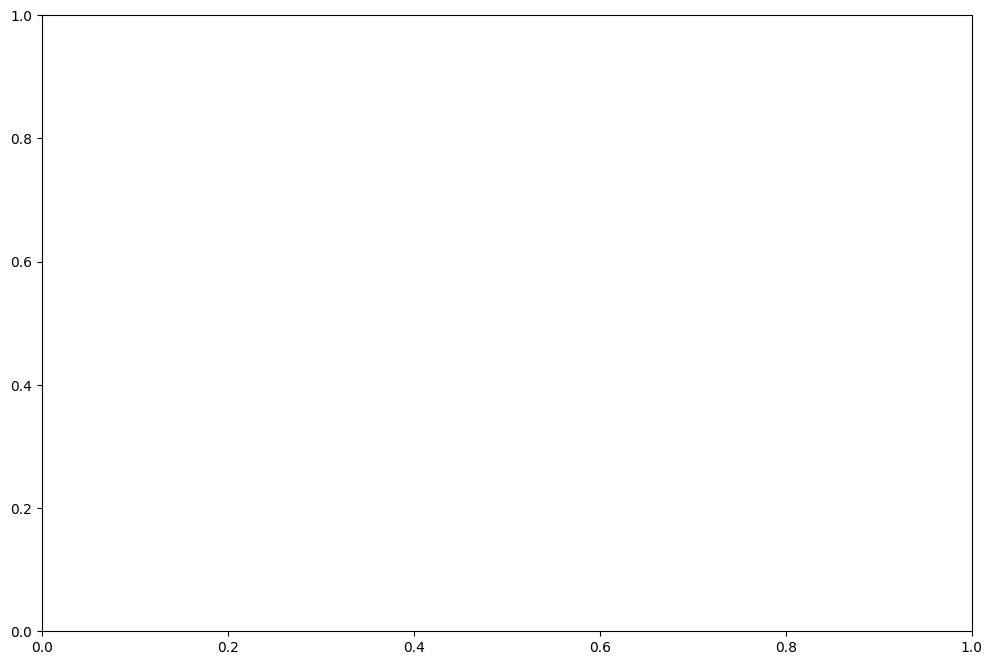

In [69]:
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)

In [32]:
from sklearn.metrics import log_loss

In [58]:
y_pred = model_poly.predict_proba(add_columns(X))
y_pred

array([[9.61377983e-01, 3.86220166e-02],
       [9.95136386e-01, 4.86361425e-03],
       [9.56276457e-01, 4.37235433e-02],
       [9.90750036e-01, 9.24996433e-03],
       [9.82943650e-01, 1.70563501e-02],
       [9.45112725e-01, 5.48872753e-02],
       [7.68924452e-01, 2.31075548e-01],
       [9.61481423e-01, 3.85185772e-02],
       [9.80475940e-01, 1.95240601e-02],
       [8.69458035e-01, 1.30541965e-01],
       [9.67778738e-01, 3.22212618e-02],
       [8.48253893e-01, 1.51746107e-01],
       [9.71853567e-01, 2.81464332e-02],
       [9.82755506e-01, 1.72444942e-02],
       [9.55882549e-01, 4.41174509e-02],
       [9.96866968e-01, 3.13303189e-03],
       [8.93478668e-01, 1.06521332e-01],
       [8.84388855e-01, 1.15611145e-01],
       [7.59896913e-01, 2.40103087e-01],
       [9.80191229e-01, 1.98087708e-02],
       [9.74183170e-01, 2.58168296e-02],
       [9.52442223e-01, 4.75577773e-02],
       [9.47962920e-01, 5.20370799e-02],
       [9.90972990e-01, 9.02700996e-03],
       [7.970334

In [59]:
log_loss(y, y_pred)

0.0569550261485079

# Regularización

In [50]:
X, y = generate_gaussians_distributions()
# X, y = generate_elipse_data()

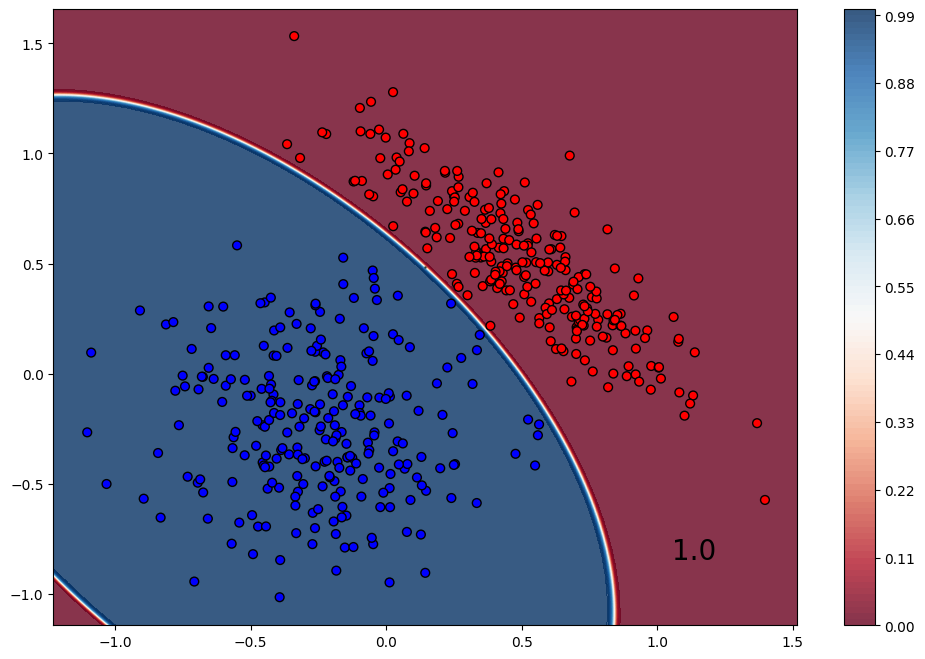

In [51]:
C = 1e7 # Modifique el valos de C
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False, C=C)
model_poly.fit(add_columns(X), y)
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)